In [1]:
# ---------------------------- #
#     Fix import structure     #
# ---------------------------- #
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
module_path = os.path.abspath('../../..')
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from examples.RTP.env import RTP
from examples.RTP.main import run_game, create_models

# ---------------------------- #
#    Run game test with viz    #
# ---------------------------- #

parameters = {
    'world_size': 20, # Size of the environment
    'num_models': 1, # Number of agents. Right now, only supports 1
    'sync_freq': 200, # Parameters related to model soft update. TODO: Figure out if these are still needed
    'model_update_freq': 4, # Parameters related to model soft update. TODO: Figure out if these are still needed 
    'epsilon': 0.3, # Exploration parameter
    'conditions': ['None'], # Model run conditions
    'epsilon_decay': 0.999, # Exploration decay rate
    'episodic_decay_rate': 1.0, # EWA episodic decay rate
    'similarity_decay_rate': 1.0,
    'epochs': 200, # Number of epochs
    'max_turns': 20, # Number of turns per game
    'object_memory_size': 12000, # Size of the memory buffer
    'knn_size': 5, # Size of the nearest neighbours
    'RUN_PROFILING': False, # Whether to time each epoch
    'log': False, # Tensorboard support. Currently disabled
    'contextual': True, # Whether the agents' need changes based on its current resource value or stays static
    'appearance_size': 20
}

# Run model with all of the conditions
for condition in range(len(parameters['conditions'])):
        all_models = create_models(
            appearance_size = parameters['appearance_size'],
            episodic_decay_rate = parameters['episodic_decay_rate'],
            similarity_decay_rate = parameters['similarity_decay_rate'],
            knn_size = parameters['knn_size']
        )

        env = RTP(
            height=parameters['world_size'],
            width=parameters['world_size'],
            layers=1,
            contextual=parameters['contextual']
        )

        all_models, env = run_game(
            all_models,
            env,
            epsilon=parameters['epsilon'],
            epochs=parameters['epochs'],
            max_turns=parameters['max_turns'],
            epsilon_decay=parameters['epsilon_decay'],
            condition=parameters['conditions'][condition],
            sync_freq=parameters['sync_freq'],
            model_update_freq=parameters['model_update_freq'],
            RUN_PROFILING=parameters['RUN_PROFILING']
        )

Fixing import structure...
20 21 -103 [4, 4, 143] 194.73715168237686 0.2937626027894116 0 None
40 21 -1 [6, 12, 61] 290.2861512750387 0.28794283215752287 0 None
60 21 68 [7, 18, 2] 276.31141632795334 0.2822383577882836 0 None
80 21 51 [7, 10, 19] 191.31953611969948 0.27664689553184973 0 None
100 21 83 [9, 17, 7] 171.48732045292854 0.2711662064899787 0 None
120 21 89 [9, 22, 1] 194.00127869844437 0.26579409611954335 0 None
140 21 134 [14, 24, 6] 306.5916958749294 0.2605284133538074 0 None
160 21 96 [11, 21, 14] 309.8520406484604 0.2553670497411083 0 None
180 21 64 [7, 29, 6] 231.7442517876625 0.25030793860060435 0 None


Took action: down. Received -1.


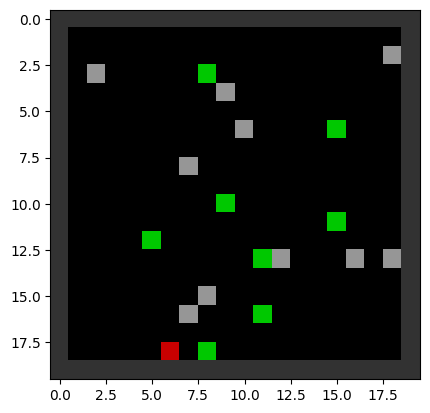

Game over. Received 4 total reward.


In [31]:
from examples.RTP.utils import run_one_game

run_one_game(
    all_models,
    condition='None',
    env=env,
    max_turns=20,
    save = False,
    run_id=2
)